# Apple Quality

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

[Данные](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Инициализация API
api = KaggleApi()
api.authenticate()

# Путь для сохранения набора данных
dataset_path = 'Data/Apple_Quality/'

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Скачивание и распаковка набора данных
api.dataset_download_files('nelgiriyewithana/apple-quality', path=dataset_path, unzip=True)

In [3]:
df = pd.read_csv('Data/Apple_Quality/apple_quality.csv')
df.sample(5)

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
769    769.0  1.975435  1.479167  -1.281637     0.094645   2.811324 -2.693316   
3772  3772.0  1.639814 -3.695538   0.026942     1.553568   1.661156  3.530639   
914    914.0 -3.699119 -1.922430  -1.971064     2.204418   0.115186  1.769828   
371    371.0 -2.485169 -1.009284  -4.660951     0.478236  -1.340587  4.170449   
3020  3020.0 -2.323341 -2.585399   1.307612     1.118136   1.429309 -0.198740   

           Acidity Quality  
769   -0.471432166     bad  
3772   0.538838538    good  
914   -3.135860673     bad  
371   -2.090361332     bad  
3020  -3.861990488     bad

In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df['Acidity'] = df['Acidity'].astype('float64')

In [8]:
df.drop(['A_id'],axis=1,inplace=True)

In [9]:
df.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness      Acidity  
count  4000.000000  4000.000000  
mean      0.498277     0.076877  
std       1.874427     2.110270  
min      -5.864599    -7.010538  
25%      -0.771677    -1.377424  
50%       0.503445     0.022609  
75%       1.766212     1.510493  
max       7.237837     7.404736

In [10]:
df.duplicated().sum()

0

In [11]:
from pycaret.classification import *
s = setup(df, target = 'Quality', session_id = 23)

In [12]:
best = compare_models()

In [13]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
predict_model(best)

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3651  2.539110 -1.781324  -0.464490     2.843897   4.002744 -2.228520   
2609 -1.767223 -0.934014   0.531094     1.025545   1.699573 -1.215804   
2171 -0.047807  1.481495  -1.241820     1.153463   0.707333  0.402332   
228  -1.784149 -1.101582   0.703586     4.190645   2.960539  0.014368   
3189 -2.413640 -1.173870   1.334295     2.011637   2.290939 -0.364300   
...        ...       ...        ...          ...        ...       ...   
3383  1.030426 -0.020293   0.185796     0.171099   1.461804 -1.405084   
3866  1.954015 -0.621092  -3.462694    -0.418658  -1.017421  2.119515   
398   0.780136 -1.562171   0.867887     3.279170   3.136770  0.853514   
1959 -3.163119 -0.123304  -0.202617     2.206348  -1.494392  3.447359   
278  -2.263612  2.126845  -1.563019    -1.675057   0.025071  1.927114   

       Acidity Quality prediction_label  prediction_score  
3651  2.360765    good             good               1.0  
2609  4.158395     bad              bad               1.0  
2171 -2.650828     bad             good               1.0  
228   1.134335    good             good               1.0  
3189 -1.626572    good             good               1.0  
...        ...     ...              ...               ...  
3383  1.372601    good             good               0.8  
3866 -1.248235    good              bad               0.6  
398  -0.117891    good             good               1.0  
1959  0.011512     bad              bad               1.0  
278   0.764295     bad              bad               1.0  

[1200 rows x 10 columns]

In [16]:
cb = create_model('catboost')

In [17]:
tuned_cb = tune_model(cb)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
evaluate_model(tuned_cb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

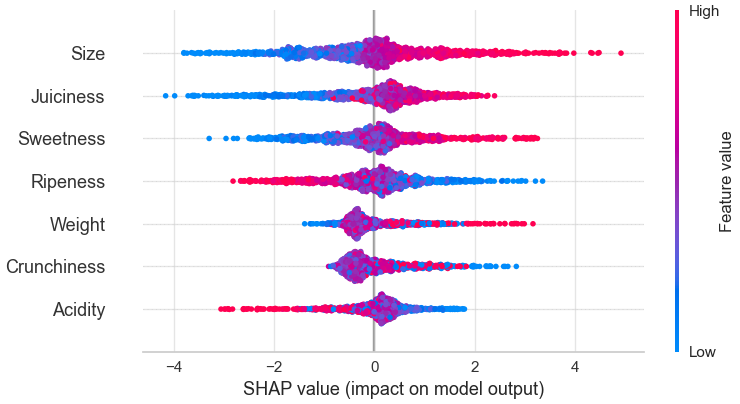

In [19]:
interpret_model(tuned_cb)

In [23]:
interpret_model(tuned_cb, plot = 'reason', observation = 23)